# RELATÓRIO POR REGIÃO SOBRE CORONA VÍRUS NO BRASIL

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [271]:
df = pd.read_csv("brazil_covid19.csv")

In [272]:
df.head()

,date,hour,state,suspects,refuses,cases,deaths
0,2020-01-30,16:00,Minas Gerais,1,0,0,0
1,2020-01-30,16:00,Rio de Janeiro,1,0,0,0
2,2020-01-30,16:00,Santa Catarina,0,2,0,0
3,2020-01-30,16:00,São Paulo,3,1,0,0
4,2020-01-30,16:00,Rio Grande do Sul,2,2,0,0


In [273]:
df = df.drop('hour',axis=1)

In [274]:
df.head()

,date,state,suspects,refuses,cases,deaths
0,2020-01-30,Minas Gerais,1,0,0,0
1,2020-01-30,Rio de Janeiro,1,0,0,0
2,2020-01-30,Santa Catarina,0,2,0,0
3,2020-01-30,São Paulo,3,1,0,0
4,2020-01-30,Rio Grande do Sul,2,2,0,0


# Escreva o nome da região e descomente abaixo para gerar o relatório da região que deseja. Não esqueça de alterar a variável region com a região do relatório

In [275]:
import collections

In [276]:
south = ["Santa Catarina", "Rio Grande do Sul","Paraná"]
north = ["Acre", "Amapá", "Amazonas", "Pará", "Rondônia", "Roraima", "Tocantins"]
northest = ["Alagoas", "Bahia", "Ceará", "Maranhão", "Paraíba", "Pernambuco", "Piauí", "Rio Grande do Norte", "Sergipe"]  
southest =  ["Espirito Santo", "Minas Gerais", "Rio de Janeiro","São Paulo"]
center = ["Distrito Federal", "Goiás", "Mato Grosso" ,"Mato Grosso do Sul"]

region = center

is_state = df.state.isin(region)


In [277]:
df[is_state].head()

,date,state,suspects,refuses,cases,deaths
112,2020-02-13,Distrito Federal,0,1,0,0
120,2020-02-14,Distrito Federal,0,1,0,0
128,2020-02-15,Distrito Federal,0,1,0,0
136,2020-02-16,Distrito Federal,0,1,0,0
144,2020-02-17,Distrito Federal,0,1,0,0


Altere a data aqui, quando conseguir o documento com dados de outras data. Esse filtro foi criado para evitar pegar dados com valor zero, por falta de informação

In [278]:
filter_date = df['date'] < '2020-03-19'
df = df[filter_date]
state =  df[is_state].drop('state', axis=1).groupby('date').sum()


/home/nathana/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [279]:
state.head()

,suspects,refuses,cases,deaths
date,,,,
2020-02-13,0,1,0,0
2020-02-14,0,1,0,0
2020-02-15,0,1,0,0
2020-02-16,0,1,0,0
2020-02-17,0,1,0,0


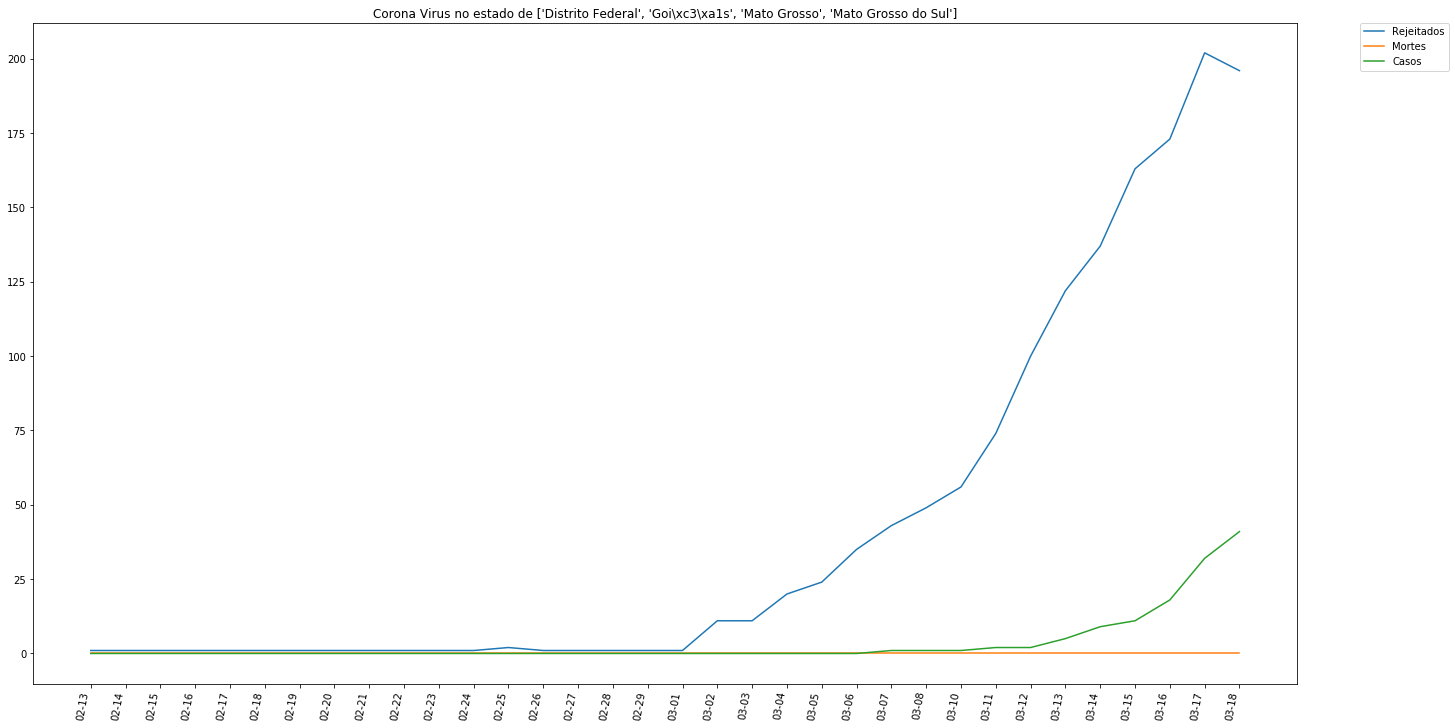

In [280]:
import operator

def namestr(**kwargs):
    for k,v in kwargs.items():
        return k 


def transformDict (state, type_graph):
    col = state[type_graph].apply(lambda _df: int(np.unique(_df))).to_dict()
    col = collections.OrderedDict(sorted(col.items()))
    return col

refuse = transformDict(state, 'refuses')
death = transformDict(state, 'deaths')
case =  transformDict(state, 'cases')
suspect = transformDict(state, 'suspects')

keys =  [str(k[5:]) for k in refuse.keys()]

fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(20, 10))
axs.plot(keys, refuse.values(), label="Rejeitados")
axs.plot(keys,death.values(), label="Mortes")
axs.plot(keys,case.values(), label="Casos")

#axs.plot(keys,suspect.values(), label="Suspeitos")
for label in axs.get_xticklabels():
    label.set_rotation(80)
    label.set_horizontalalignment('right')
axs.set_title("Corona Virus no estado de "+ str(region))
axs.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


In [281]:
data = [[region,suspect.popitem()[1], refuse.popitem()[1],case.popitem()[1],death.popitem()[1]]]
pd.DataFrame(data, columns=["Região","Suspeitos", "Rejeitados","Casos","Mortes"])

,Região,Suspeitos,Rejeitados,Casos,Mortes
0,"[Distrito Federal, Goiás, Mato Grosso, Mato Gr...",818,196,41,0
